## chapter introduction by Halil Hasmer

This chapter introduces matplotlib, which I am also familiar with, and adding/modifying pandas dataframes.

Note for myself: I am still not okay with row to row iterations in pandas. I should look into that more (maybe exercise on iterrows() ?)

# Python For Traders and Investors - Chapter 3

## 3.1 Build VWAP From a Text File

To bring it all together, let's calculate the volume weighted average price (VWAP) for our price data. Once you understand this, you are not so far from building your own backtests. For the VWAP calculation we need the daily close prices and the volumes. We need to re-open the file, so we can start again from the first value.

Secondly, for a VWAP we need a lookback period for which we can calculate the average. Let's use a 20-day window. In order to store the values we can write them to a list and then do some calculations with that list. Writing values to a list is easy. First, we need to initialize the list:

In [71]:
my_values = []

In [72]:
# Next, we put values in the list:
my_values.append(12.64)
my_values.append(1.04)
my_values

[12.64, 1.04]

In a list we can even mix different data types:

In [73]:
my_values.append('hello world')
my_values

[12.64, 1.04, 'hello world']

Now we have enough knowledge to build our VWAP function:

In [74]:
# Initialising lists 
close_prices = []
volumes = []

# Opening file
fid = open('output.csv')
print(fid.readline())
for i in fid:
    line = i.strip().split(',')
    cl = float(line[4])
    vol = float(line[5])
    close_prices.append(cl)
    volumes.append(vol)

Date,Open,High,Low,Close,Adj Close,Volume



When we run this code, we produce two lists, one for close prices and one for volumes. Let's look at the list with the volumes. Often, we don't really want to look at all the values at once, but maybe just the first 5. For lists we cannot use the head() function as we did earlier for Pandas data frames. We use indexing instead, which is just as easy.

In [75]:
volumes[0:5]

[1106.5999755859375,
 1084.8699951171875,
 1084.0899658203125,
 1081.260009765625,
 1069.6400146484375]

In Python we don't even need to specify the zeros and we can simpy do this:

In [76]:
volumes[:5]

[1106.5999755859375,
 1084.8699951171875,
 1084.0899658203125,
 1081.260009765625,
 1069.6400146484375]

Let's print the last 5 values:

In [77]:
volumes[-5:]

[2461.47998046875,
 2373.0,
 2285.889892578125,
 2370.449951171875,
 2282.18994140625]

Note, the minus sign in the index. It is easy to see that we can pick out any set of values from our list:

In [78]:
volumes[20:25]

[1148.18994140625,
 1144.22998046875,
 1160.1099853515625,
 1159.27001953125,
 1183.5799560546875]

Now that we have the lists we are ready to do some maths. There is a package that is perfect for that called numpy. It allows us to do a wide range of calculations with lists and arrays. In order to avoid having to type the word numpy every time, by convention we import it as **np** like this:

In [79]:
import numpy as np

Let's do some calculations:

In [80]:
np.multiply(close_prices, volumes)

array([1224563.5059668 , 1176942.90630557, 1175251.05399229,
       1169123.20871836, 1144129.76093711, 1175077.70127207,
       1156291.72211289, 1179309.03675938, 1178201.59649903,
       1175229.35111953, 1140773.41016592, 1160941.53776699,
       1210000.        , 1288225.        , 1329501.33168125,
       1324847.08536172, 1315494.19049317, 1286908.83610488,
       1283031.85560703, 1301652.86570801, 1318340.14154649,
       1309262.24820352, 1345855.1781124 , 1343906.97818398,
       1400861.51237442, 1389309.97797227, 1402021.63770498,
       1367589.77655625, 1367239.19545078, 1297958.98515469,
       1282828.05333926, 1247554.8327086 , 1269633.23442227,
       1275069.92377305, 1304415.21863975, 1246081.10380703,
       1302542.95326328, 1334209.7048793 , 1362542.66679531,
       1362215.81379355, 1372318.44007969, 1443025.61106211,
       1450627.64225723, 1431636.20346934, 1471562.97978164,
       1471150.75101377, 1437840.7514502 , 1434916.50609805,
       1466521.        ,

We can see that this operation returns something that is called *array*. An array is a data type similar to a list but has some important differences:
- In a list each element can be stored anywhere in memory and has a pointer to the previous and the next element.
- To access a element in a list one has to start with the first element and travese the whole list until the right element is found.
- In an array each element is stored next to each other. Each element can be accessed directly without traversing.
- Arrays are smaller in size and much faster to access.
- With lists it is much easier to append and insert data, which is very inefficient with arrays.
- List and arrays can be converted into each other.

Right now, we don't need to worry to much what we should use, just be aware of the differences between the two.

With this we can now build our VWAP calculation:

In [81]:
np.sum(np.multiply(close_prices[:20],volumes[:20])) / np.sum(volumes[:20])

1104.8259518275672

In [82]:
# sum of daily_volume x price divided by total volume
np.sum(np.multiply(close_prices[:20],volumes[:20])) / np.sum(volumes[:20])

1104.8259518275672

Let's compare that to the actual price on that day:

In [83]:
close_prices[19]

1140.9000244140625

In [84]:
close_prices[20]

1148.18994140625

You might notice that we used index 19 rather than 20. This is because close_prices[0:20] actually gives us the 20 values from index 0 to 19. While this is confusing at first, Python does that to make everything else really easy. We just have to be aware that in slices (indices in square brackets with colons) the value before the colon is inclusive and the value after the colon exculsive. **This is really important to remember as it can be a major issue that introduces look-ahead errors when we run backtests**

In [85]:
close_prices = []
volumes = []
vwaps = []

In [86]:
fid = open('output.csv')
fid.readline() 

'Date,Open,High,Low,Close,Adj Close,Volume\n'

In [87]:
count=0
for i in fid:
    line = i.strip().split(',')
    cl = float(line[4])
    vol = float(line[5])
    close_prices.append(cl)
    volumes.append(vol)
    vwap = np.sum(np.multiply(close_prices[-20:],volumes[-20:]))/np.sum(volumes[-20:])
    vwaps.append(vwap)
    count +=1
print(count)
print(len(vwaps))

999
999


In [88]:
fid.close()

Note that for the first lines the index [-20:] would be negative. Python ignores that and simply starts with zero. This means that at first our VWAP is built from less than 20 values.

## 3.2 Pandas for financial data

The Pandas package is probably the biggest reason why Python is so popular in finance. It provides a set of tools that makes it much easier to build quantitative analysis models. We already used some Pandas function above and now we dive into it much deeper. 

Pandas is similar to a database application like MySql but with many convenient functions on top of it. Its most important structure is a data frame, which is effectively a table with dated rows and different columns, just like what we've seen previously. Pandas sits on top on Numpy and most of the numpy mathematical functions can be used with Pandas, with the advantage that we now have dates along with our normal indices.

Let's start again by reading our file into a Pandas data frame. 

In [89]:
import pandas as pd

In [90]:
data = pd.read_csv('output.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-14,1105.569946,1118.150024,1104.800049,1106.599976,1106.599976,1966900
1,2018-05-15,1096.900024,1099.119995,1078.780029,1084.869995,1084.869995,1786900
2,2018-05-16,1085.089966,1094.380005,1081.630005,1084.089966,1084.089966,1281400
3,2018-05-17,1081.459961,1091.000000,1076.420044,1081.260010,1081.260010,1286900
4,2018-05-18,1066.000000,1073.729980,1064.680054,1069.640015,1069.640015,1774100


In [91]:
data = pd.read_csv('output.csv', index_col=0, parse_dates=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-14,1105.569946,1118.150024,1104.800049,1106.599976,1106.599976,1966900
2018-05-15,1096.900024,1099.119995,1078.780029,1084.869995,1084.869995,1786900
2018-05-16,1085.089966,1094.380005,1081.630005,1084.089966,1084.089966,1281400
2018-05-17,1081.459961,1091.000000,1076.420044,1081.260010,1081.260010,1286900
2018-05-18,1066.000000,1073.729980,1064.680054,1069.640015,1069.640015,1774100


In [92]:
data.index[0]

Timestamp('2018-05-14 00:00:00')

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 999 entries, 2018-05-14 to 2022-04-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       999 non-null    float64
 1   High       999 non-null    float64
 2   Low        999 non-null    float64
 3   Close      999 non-null    float64
 4   Adj Close  999 non-null    float64
 5   Volume     999 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 54.6 KB


In [94]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02
mean,1704.409649,1721.848295,1686.205137,1704.415665,1704.415665,1.744098e+06
std,639.707356,644.643450,632.467513,638.286028,638.286028,8.052879e+05
min,984.320007,1012.119995,977.659973,984.669983,984.669983,4.656000e+05
25%,1183.769958,1195.550049,1171.870056,1183.784973,1183.784973,1.227150e+06
50%,1431.619995,1443.000000,1419.189941,1432.699951,1432.699951,1.542400e+06
75%,2294.244995,2309.839966,2266.184937,2289.339966,2289.339966,1.998650e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,6.658900e+06


In [95]:
import matplotlib.pyplot as plt

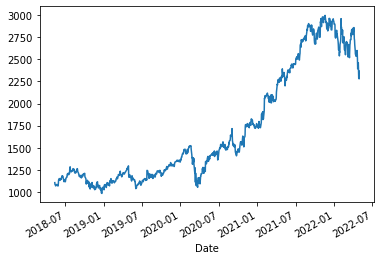

In [96]:
# Plotting a single column
data['Close'].plot()
plt.show()

## 3.3 Plotting time series data

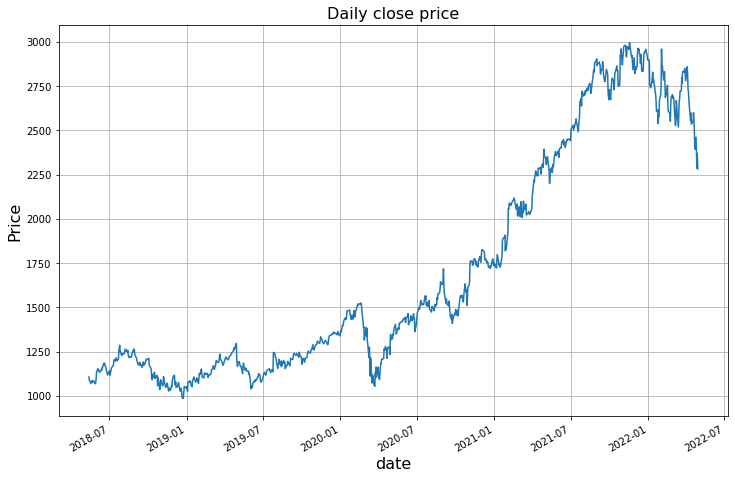

In [97]:
# Setting the figure size
plt.figure(figsize=(12,8))
data['Close'].plot()

# Setting the x, y labels and title
plt.xlabel('date', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.title('Daily close price', fontsize=16)

# Add grid
plt.grid()
plt.show()

Lets plot the moving average:

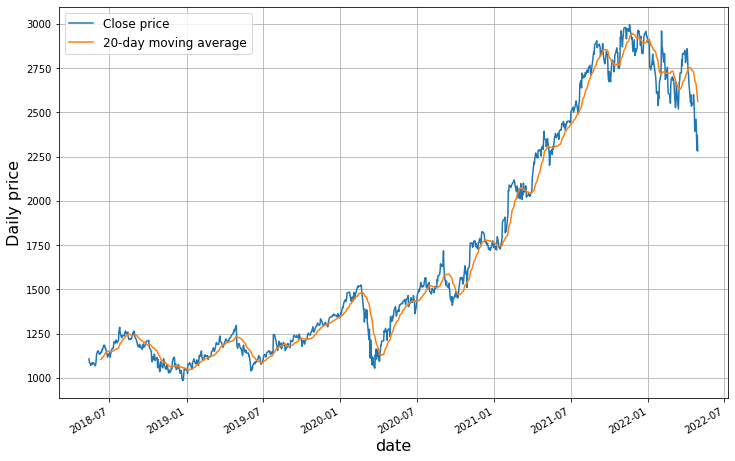

In [98]:
plt.figure(figsize=(12,8))
data['Close'].plot()

# 20-day moving average
data['Close'].rolling(20).mean().plot()

plt.xlabel('date', fontsize=16)
plt.ylabel('Daily price', fontsize=16)

# Add legends
plt.legend(['Close price', '20-day moving average'], fontsize=12)

plt.grid()
plt.show()

That was really easy! How about the VWAP? A bit harder but still only one line compared to 13 lines before:

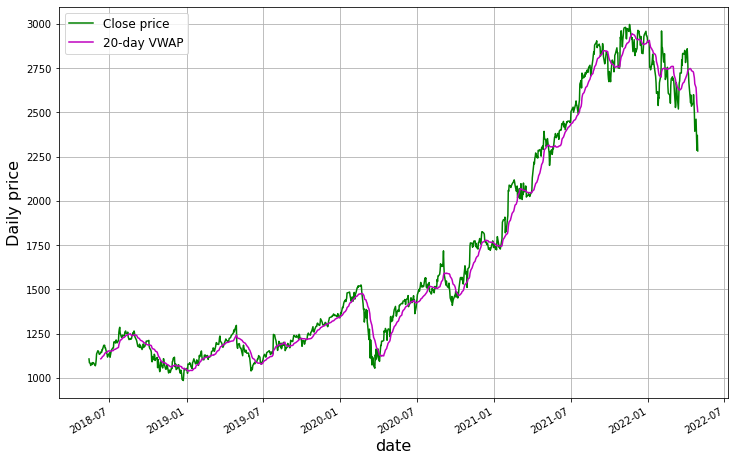

In [99]:
plt.figure(figsize=(12,8))
data['Close'].plot(color='g')

# 20-day VWAP
vwap = (data['Close']*data['Volume']).rolling(20).sum()/data['Volume'].rolling(20).sum()
vwap.plot(color='m')

plt.xlabel('date', fontsize=16)
plt.ylabel('Daily price', fontsize=16)

# Add legends
plt.legend(['Close price', '20-day VWAP'], fontsize=12)

plt.grid()
plt.show()

In [100]:
# my added code-block to insert vwap and 20 day ema into the dataframe

data['vwap'] = (data['Close']*data['Volume']).rolling(20).sum()/data['Volume'].rolling(20).sum()
data['20-ma'] = data.Close.rolling(20).mean()
data

,Open,High,Low,Close,Adj Close,Volume,vwap,20-ma
Date,,,,,,,,
2018-05-14,1105.569946,1118.150024,1104.800049,1106.599976,1106.599976,1966900,NaN,NaN
2018-05-15,1096.900024,1099.119995,1078.780029,1084.869995,1084.869995,1786900,NaN,NaN
2018-05-16,1085.089966,1094.380005,1081.630005,1084.089966,1084.089966,1281400,NaN,NaN
2018-05-17,1081.459961,1091.000000,1076.420044,1081.260010,1081.260010,1286900,NaN,NaN
2018-05-18,1066.000000,1073.729980,1064.680054,1069.640015,1069.640015,1774100,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-04-25,2382.020020,2465.550049,2370.219971,2461.479980,2461.479980,2306400,2639.660239,2660.815515
2022-04-26,2445.889893,2450.199951,2370.219971,2373.000000,2373.000000,3652700,2600.639003,2638.010010
2022-04-27,2289.389893,2344.840088,2254.729980,2285.889893,2285.889893,4591000,2549.103016,2609.798999


In [101]:
# my added code block to identify the rows where vwap is above 20 day moving average

hilo = list()

for _, row in data.iterrows():
    if (row["vwap"] > 0.0) and (row['20-ma'] > 0.0):
        if row['vwap'] < row['20-ma']:
            hilo.append(25.0)
        else:
            hilo.append(row['20-ma'] + 15)
    else:
        hilo.append(100.0)

data['hilo'] = hilo
data.tail()

,Open,High,Low,Close,Adj Close,Volume,vwap,20-ma,hilo
Date,,,,,,,,,
2022-04-25,2382.020020,2465.550049,2370.219971,2461.479980,2461.479980,2306400,2639.660239,2660.815515,25.0
2022-04-26,2445.889893,2450.199951,2370.219971,2373.000000,2373.000000,3652700,2600.639003,2638.010010,25.0
2022-04-27,2289.389893,2344.840088,2254.729980,2285.889893,2285.889893,4591000,2549.103016,2609.798999,25.0
2022-04-28,2328.300049,2392.989990,2282.300049,2370.449951,2370.449951,2444200,2529.929875,2586.382996,25.0
2022-04-29,2334.689941,2358.399902,2276.290039,2282.189941,2282.189941,2131800,2503.653181,2561.424988,25.0


In [102]:
print(hilo[:15])
data.sample(10)

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


,Open,High,Low,Close,Adj Close,Volume,vwap,20-ma,hilo
Date,,,,,,,,,
2021-05-14,2258.540039,2284.719971,2250.000000,2278.379883,2278.379883,1599800,2305.557476,2301.461011,2316.461011
2021-05-25,2372.000000,2384.000000,2355.000000,2362.870117,2362.870117,1122000,2311.569841,2308.831006,2323.831006
2020-04-08,1203.099976,1214.900024,1183.949951,1207.000000,1207.000000,2016700,1122.624808,1126.986505,25.000000
2021-10-01,2688.949951,2738.209961,2681.459961,2730.860107,2730.860107,1768000,2798.955634,2812.786011,25.000000
2018-10-30,1020.010010,1050.900024,1013.969971,1049.510010,1049.510010,2988400,1104.172028,1114.107001,25.000000
2021-03-10,2061.399902,2061.399902,2019.329956,2036.189941,2036.189941,1355000,2059.971173,2064.542517,25.000000
2021-07-06,2512.969971,2528.560059,2491.649902,2523.800049,2523.800049,1320200,2441.387973,2442.145972,25.000000
2021-03-17,2068.469971,2099.000000,2044.119995,2082.219971,2082.219971,1319100,2055.895854,2058.118005,25.000000
2021-06-25,2440.000000,2452.659912,2431.300049,2450.169922,2450.169922,1729700,2415.027740,2413.959497,2428.959497


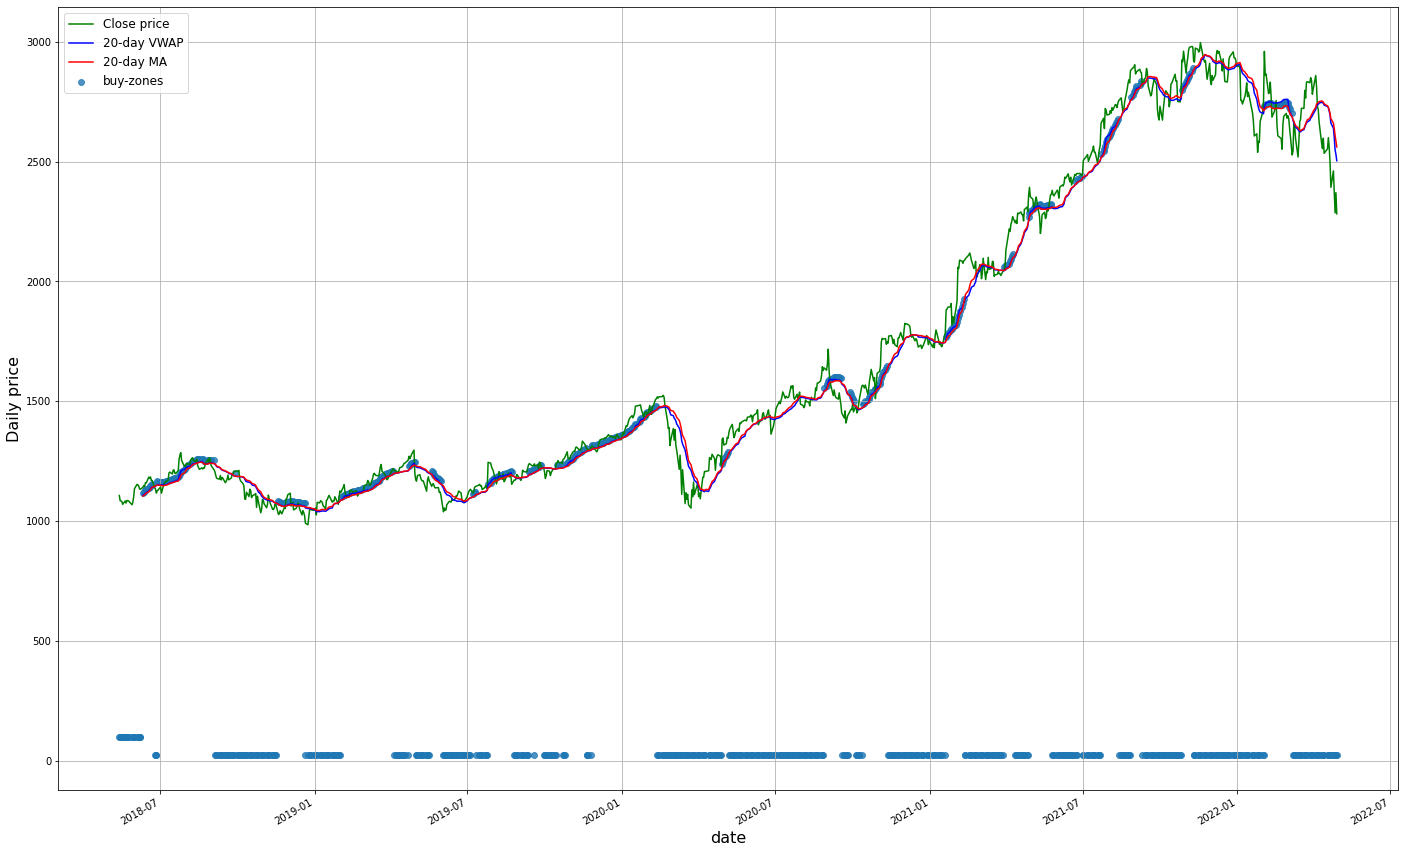

In [103]:
# this block is something that i tried... and failed.

plt.figure(figsize=(24,16))
data['Close'].plot(color='g')
data['vwap'].plot(color='b')
data['20-ma'].plot(color='r')
plt.scatter(data.index, data.hilo, alpha=0.8, marker='o', linewidths=0.9)

plt.xlabel('date', fontsize=16)
plt.ylabel('Daily price', fontsize=16)

# Add legends
plt.legend(['Close price', '20-day VWAP', '20-day MA', 'buy-zones'], fontsize=12)

plt.grid()
plt.show()

### My note:
 Instead of finding the times where vwap crosses 20-ma, maybe I should look into the times where vwap turns its line up i.e it has a positive derivative (slope/angle). Because it seems that this strategy alone would've missed a lot of great leaps upward.
note #2: enter-signals comes way too late too often. 

__daily ranges__

In [104]:
data['range'] = data['High'] - data['Low']
data.head()

,Open,High,Low,Close,Adj Close,Volume,vwap,20-ma,hilo,range
Date,,,,,,,,,,
2018-05-14,1105.569946,1118.150024,1104.800049,1106.599976,1106.599976,1966900,NaN,NaN,100.0,13.349976
2018-05-15,1096.900024,1099.119995,1078.780029,1084.869995,1084.869995,1786900,NaN,NaN,100.0,20.339966
2018-05-16,1085.089966,1094.380005,1081.630005,1084.089966,1084.089966,1281400,NaN,NaN,100.0,12.750000
2018-05-17,1081.459961,1091.000000,1076.420044,1081.260010,1081.260010,1286900,NaN,NaN,100.0,14.579956
2018-05-18,1066.000000,1073.729980,1064.680054,1069.640015,1069.640015,1774100,NaN,NaN,100.0,9.049927


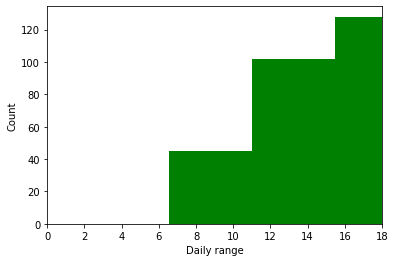

In [105]:
plt.hist(data['range'], bins=40, color='g')
plt.xlim([0, 18])
plt.xlabel('Daily range')
plt.ylabel('Count')
plt.show()